# Predict The Flight Ticket Price Hackathon

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. 

### Objective
Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

### Hackathon
https://www.machinehack.com/course/predict-the-flight-ticket-price-hackathon/

### Dataset insights
- Size of training set: 10683 records
- Size of test set: 2671 records

### FEATURES:
- **Airline**: The name of the airline.
- **Date_of_Journey**: The date of the journey
- **Source**: The source from which the service begins.
- **Destination**: The destination where the service ends.
- **Route**: The route taken by the flight to reach the destination.
- **Dep_Time**: The time when the journey starts from the source.
- **Arrival_Time**: Time of arrival at the destination.
- **Duration**: Total duration of the flight.
- **Total_Stops**: Total stops between the source and destination.
- **Additional_Info**: Additional information about the flight
- **Price**: The price of the ticket

# 1. Import Dependencies

In [1]:
# import neccessary libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns

# configurations
%matplotlib inline
sns.set_style('whitegrid')

# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')

# 2. Explore Dataset

## Train Dataset

In [3]:
# dataset dimensions
print("# Rows    : ", train.shape[0])
print("# Columns : ", train.shape[1])

# Rows    :  10683
# Columns :  11


In [4]:
# preview dataset
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# metadata - features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


> - All features have `object` dtype except `price`
> - 2 features have 1 missing value each. We will treat missing values further
>     - Route              
>     - Total_Stops        

In [6]:
# metadata - stats
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## Test Dataset

In [7]:
# dataset dimensions
print("# Rows    : ", test.shape[0])
print("# Columns : ", test.shape[1])

# Rows    :  2671
# Columns :  10


In [8]:
# preview dataset
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [9]:
# metadata - features
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


> - All features have `object` dtype
> - `price` feature is missing. Since it is the dependable feature.

In [10]:
# metadata - stats
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


## Combine both datasets

In [11]:
# combine test & train datasets
df = train.append(test, sort=False)

In [12]:
# preview combined dataset
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [13]:
# dataset dimensions
print("# Rows    : ", df.shape[0])
print("# Columns : ", df.shape[1])

# Rows    :  13354
# Columns :  11


# 3. Feature Engineering

In [14]:
# check feature datatypes
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

### `Date_of_Journey`

In [15]:
# split this feature into date, month & year

# date
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
# month
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
# year
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [16]:
# convert new features into 'int' dtype
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [17]:
# preview dataset
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [18]:
# check feature datatypes
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [19]:
# drop 'Date_of_Journey'
df.drop('Date_of_Journey', axis=1, inplace=True)
df.head()  # preview dataset

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


### `Arrival_Time`

In [20]:
# removing date and month from the feature
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]
# preview dataset
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


### `Total_Stops`

In [21]:
# let us see the sub-categories in 'Total_Stops' feature
df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [22]:
# check for null values
df['Total_Stops'].isnull().sum()

1

In [23]:
# locate null value
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


- 1 NaN value in this feature
- Let's check how many possible stops can there be between Delhi & Cochin

In [24]:
# number of possible stops between Delhi & Cochin
df[(df['Source'] == 'Delhi') & (df['Destination'] == 'Cochin')]['Total_Stops'].value_counts()

1 stop      4015
2 stops     1373
non-stop     262
3 stops       31
Name: Total_Stops, dtype: int64

> Since, maximum values are of `1 stop`, therefore, we will impute this NaN value with `1 stop` as a fair estimation

In [25]:
# impute the missing value
df['Total_Stops'] = df['Total_Stops'].fillna('1 stop')

In [26]:
# check for null values
df['Total_Stops'].isnull().sum()

0

- No null value present in this feature anymore

In [27]:
# now convert 'non-stop' into '0 stop'
df['Total_Stops'] = df['Total_Stops'].replace('non-stop', '0 stop')

In [28]:
# explore 'Total_Stops'
df['Total_Stops'].value_counts()

1 stop     7057
0 stop     4340
2 stops    1899
3 stops      56
4 stops       2
Name: Total_Stops, dtype: int64

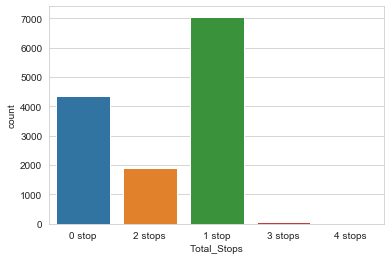

In [29]:
# plot frequencies
sns.countplot(x='Total_Stops', data=df)

>- There are maximum number of flights with 1 stop, then with 0 stop, then 2, 3, and 4 stops

In [30]:
# filter only the number of stops
df['Total_Stops'] = df['Total_Stops'].str.split(' ').str[0]

In [31]:
# convert dtype into 'int'
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [32]:
# explore 'Total_Stops'
df['Total_Stops'].value_counts()

1    7057
0    4340
2    1899
3      56
4       2
Name: Total_Stops, dtype: int64

In [33]:
# preview dataset
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019


### `Arrival_Time`

In [34]:
# split this feature into hours and minutes
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute'] = df['Arrival_Time'].str.split(':').str[1]

# convert new features into 'int' dtype
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df['Arrival_Minute'] = df['Arrival_Minute'].astype(int)

# drop original feature
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [35]:
# preview dataset
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,0,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1,No info,13302.0,1,3,2019,21,35


### `Dep_Time`

In [36]:
# split this feature into hours and minutes
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_Minute'] = df['Dep_Time'].str.split(':').str[1]

# convert new features into 'int' dtype
df['Dep_Hour'] = df['Dep_Hour'].astype(int)
df['Dep_Minute'] = df['Dep_Minute'].astype(int)

# drop original feature
df.drop(['Dep_Time'], axis=1, inplace=True)

In [37]:
# preview dataset
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


### `Route`

In [38]:
# explore 'Route'
df['Route'].nunique()

132

In [39]:
df['Route'].value_counts()

DEL → BOM → COK                      3000
BLR → DEL                            1941
CCU → BOM → BLR                      1232
CCU → BLR                             896
BOM → HYD                             785
CCU → DEL → BLR                       689
BLR → BOM → DEL                       509
MAA → CCU                             456
DEL → HYD → COK                       411
DEL → JAI → BOM → COK                 314
DEL → BLR → COK                       287
DEL → COK                             262
DEL → AMD → BOM → COK                 246
DEL → MAA → COK                       190
DEL → IDR → BOM → COK                 117
DEL → HYD → MAA → COK                 100
DEL → NAG → BOM → COK                  83
CCU → HYD → BLR                        80
CCU → MAA → BLR                        78
DEL → GOI → BOM → COK                  73
DEL → HYD → BOM → COK                  68
CCU → BBI → BLR                        60
DEL → BHO → BOM → COK                  59
DEL → CCU → BOM → COK             

>- There are a large number of different routes for all flights, total 132 routes

In [40]:
# let's us split them into different labels based on the number of arrows ( → )
# there are a maximum of 6 stops in the dataset
df['Route_1']=df['Route'].str.split('→ ').str[0]  # label for 1st location
df['Route_2']=df['Route'].str.split('→ ').str[1]  # label for 2nd location
df['Route_3']=df['Route'].str.split('→ ').str[2]  # label for 3rd location
df['Route_4']=df['Route'].str.split('→ ').str[3]  # label for 4th location
df['Route_5']=df['Route'].str.split('→ ').str[4]  # label for 5th location
df['Route_6']=df['Route'].str.split('→ ').str[5]  # label for 6th location

In [41]:
# impute the NaN values
df['Route_1'].fillna("None", inplace=True)
df['Route_2'].fillna("None", inplace=True)
df['Route_3'].fillna("None", inplace=True)
df['Route_4'].fillna("None", inplace=True)
df['Route_5'].fillna("None", inplace=True)
df['Route_6'].fillna("None", inplace=True)

# drop 'Route' & 'Duration'
df.drop(['Route','Duration'], axis=1, inplace=True)

In [42]:
# preview dataset
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None,None


In [43]:
# check for any missing values
df.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Arrival_Hour          0
Arrival_Minute        0
Dep_Hour              0
Dep_Minute            0
Route_1               0
Route_2               0
Route_3               0
Route_4               0
Route_5               0
Route_6               0
dtype: int64

>- We have missing values in the `Price` feature that are coming from the test dataset
### `Price`

In [44]:
# let us impute the missing `Price` values
# impute with mean values
df['Price'].fillna(df['Price'].mean(), inplace=True)

In [45]:
# check for any missing values
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_Hour       0
Arrival_Minute     0
Dep_Hour           0
Dep_Minute         0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
Route_6            0
dtype: int64

>- All missing values have been treated

## Treating Categorical features
### Label Encoding
>- Since we have so many sub-categories in the all categorical features
>- Majorly the price is determined by the number of stops and the locations
>- It is recommended that we perform Label encoding instead of one-hot encoding

In [46]:
# label encoding for categorical features

# import library
from sklearn.preprocessing import LabelEncoder

# initialize LabelEncoder
label_encoder = LabelEncoder()

In [47]:
# all categorical features
for i in df.columns:
    if df[i].dtype == 'O':
        print("Label Encoding : ", i)
        df[i] = label_encoder.fit_transform(df[i])

Label Encoding :  Airline
Label Encoding :  Source
Label Encoding :  Destination
Label Encoding :  Additional_Info
Label Encoding :  Route_1
Label Encoding :  Route_2
Label Encoding :  Route_3
Label Encoding :  Route_4
Label Encoding :  Route_5
Label Encoding :  Route_6


In [48]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,0,13,24,12,4,1
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,2,25,1,3,4,1
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,3,32,4,5,4,1
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,2,34,3,12,4,1
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,0,34,8,12,4,1


# 4. Feature Selection
- Here we will use the Lasso Regression model for feature selection

In [49]:
# check for any null values
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_Hour       0
Arrival_Minute     0
Dep_Hour           0
Dep_Minute         0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
Route_6            0
dtype: int64

In [50]:
# import lassso library for feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [51]:
# split the dataset into train and test

# we know that the train dataset had 10683 records, therefore,
df_train = df[0:10683]  # training dataset
df_test = df[10683:]  # testing dataset

In [52]:
# process the train dataset to split the dependent and independent features
X = df_train.drop(['Price'], axis=1)  # independent features
y = df_train['Price'] # dependent features

In [53]:
# split the training dataset for modelling and evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
# define model
model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
'''
SelectFromModel - Meta-transformer for selecting features based on importance weights.
- the estimator is Lasso
'''

'\nSelectFromModel - Meta-transformer for selecting features based on importance weights.\n- the estimator is Lasso\n'

In [55]:
# train model
model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [56]:
# check selected features
model.get_support()

'''
True : Keep this feature
False: Filter this feature out
'''

'\nTrue : Keep this feature\nFalse: Filter this feature out\n'

In [57]:
X_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Year', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour',
       'Dep_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Route_6'],
      dtype='object')

>- The model suggests that we filter out the following features
    - `Year`
    - `Route_6`

In [58]:
# check selected features
selected_features = X_train.columns[(model.get_support())]
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour',
       'Dep_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [59]:
# filter out unwanted features
X_train.drop(['Year','Route_6'], axis=1, inplace=True)
X_test.drop(['Year', 'Route_6'], axis=1, inplace=True)

# 5. Modelling

## 5.1 - RandomForestRegressor

In [60]:
# import Random Forest Regressor
from sklearn.model_selection import RandomizedSearchCV

In [61]:
# define range of hyperparameters for optimization

# number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features to consider at each split
max_features = ['auto','sqrt']

# maximum number of levels in the tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

# minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [62]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [63]:
# create a random forest grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [64]:
# import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# initialize RandomForestRegressor
rf_reg = RandomForestRegressor()

In [65]:
# Hyper Parameter Optimization with 5 cross fold validation (totalling 250 fits)
rf_random = RandomizedSearchCV(estimator=rf_reg, 
                               param_distributions=random_grid, 
                               scoring='neg_mean_squared_error', 
                               n_iter=50, 
                               cv=5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs=1)

# train the regressor model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   2.6s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   7.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   7.0s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   6.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   7.0s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   7.4s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   4.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   5.5s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   6.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.3s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.8s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   6.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   5.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   6.1s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.4s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.0s
[CV] n_estimators=900, min_samples_split=

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 15.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


## Predictions - RandomForestRegressor

In [67]:
# make predictions
y_pred = rf_random.predict(X_test)
y_pred

array([ 6106.9208465 ,  3896.71511508, 12039.56596092, ...,
       11602.67125978, 14288.24517262,  7694.52000794])

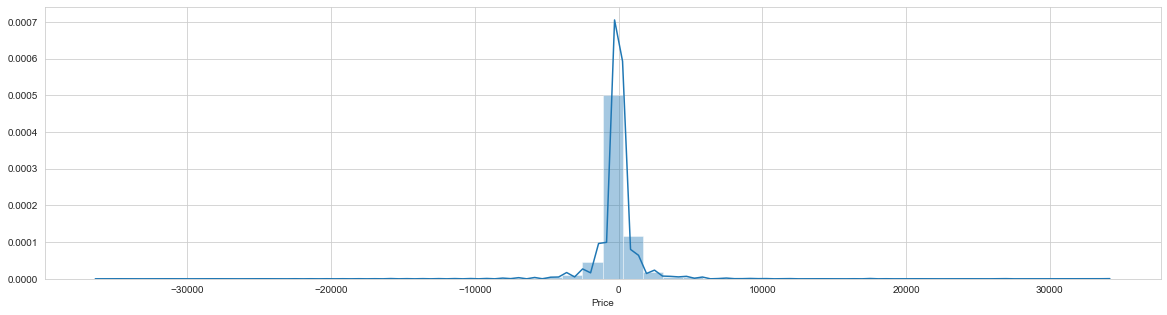

In [69]:
# residual distribution plot
plt.figure(figsize=(20,5))
sns.distplot(y_test-y_pred)

>- Residual plot is distributed normally, i.e. Gaussian distribution

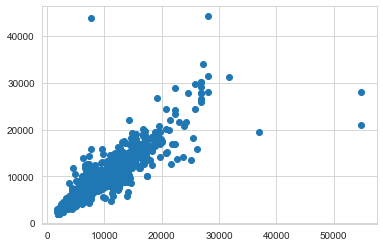

In [70]:
# scatter plot
plt.scatter(y_test, y_pred)

>- Scatter plot is linearly distributed